## Package Importing

In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing

In [462]:
crime_in = pd.read_csv('crimedata2.csv')
print(crime_in.shape)
crime_in.head()

(2215, 147)


,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


## Data initial exploration

In [463]:
crime_in = crime_in.replace('?', np.nan)
print(crime_in.isnull().sum())
# drop rows with violent crime rate missing
crime_in = crime_in.dropna(subset=['ViolentCrimesPerPop'])
# convert violent crimes perpop to float
crime_in['ViolentCrimesPerPop'] = crime_in['ViolentCrimesPerPop'].astype(float)
crime_in = crime_in.interpolate(method='nearest')

communityname             0
state                     0
countyCode             1221
communityCode          1224
fold                      0
                       ... 
autoTheftPerPop           3
arsons                   91
arsonsPerPop             91
ViolentCrimesPerPop     221
nonViolPerPop            97
Length: 147, dtype: int64


C:\Users\fantu\AppData\Local\Temp\ipykernel_14780\2546303283.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  crime_in = crime_in.interpolate(method='nearest')


In [464]:
crime_in.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,NaN,NaN,306.64,NaN
5,Springfieldcity,MO,NaN,NaN,1,140494,2.45,2.51,95.65,0.90,...,2094,1386.46,7690,5091.64,454,300.6,134,88.72,442.95,6867.42


In [465]:
crime_in.describe()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,ViolentCrimesPerPop
count,1994.000000,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,5.511535,5.225143e+04,2.706810,9.509694,83.489218,2.750787,8.481610,14.431214,27.617357,13.985421,...,51.323862,77.114127,87.732728,27.962889,2789.862487,3.062944,1.009965,7.434303,5.981364,589.078922
std,2.882916,2.021475e+05,0.343156,14.101979,16.393607,4.648200,15.208788,4.478570,6.148044,5.896879,...,10.659650,10.791485,7.448660,114.827752,2920.185784,4.963083,2.913227,56.031368,9.131550,614.784518
min,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,...,11.830000,27.950000,32.830000,0.900000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.435925e+04,2.490000,0.940000,75.882500,0.612500,0.920000,12.230000,24.380000,11.340000,...,44.677500,71.922500,84.732500,7.400000,1170.825000,0.350000,0.000000,0.000000,0.000000,161.700000
50%,5.000000,2.268100e+04,2.650000,3.150000,89.605000,1.240000,2.340000,13.620000,26.765000,12.540000,...,51.870000,79.315000,89.635000,13.700000,1996.100000,1.220000,0.000000,1.000000,2.500000,374.060000
75%,8.000000,4.315375e+04,2.850000,11.965000,95.987500,2.737500,8.610000,15.387500,29.180000,14.357500,...,58.505000,84.700000,92.730000,25.775000,3270.400000,3.377500,0.000000,3.000000,8.632500,794.400000
max,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,...,78.560000,96.590000,99.900000,3569.800000,44229.900000,54.330000,48.440000,1946.000000,91.090000,4877.060000


In [466]:
crime_in.loc[(crime_in['population'] >= 10000) & (crime_in['population'] < 25000), 'size'] = 'small'
crime_in.loc[(crime_in['population'] >= 25001) & (crime_in['population'] < 50000), 'size'] = 'medium'
crime_in.loc[(crime_in['population'] >= 50001) & (crime_in['population'] < 200000), 'size'] = 'large'
crime_in.loc[crime_in['population'] >= 200000, 'size'] = 'superLarge'
crime_in.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,size
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59,small
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95,small
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51,medium
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,1301.78,716,4142.56,47,271.93,NaN,NaN,306.64,NaN,small
5,Springfieldcity,MO,NaN,NaN,1,140494,2.45,2.51,95.65,0.90,...,1386.46,7690,5091.64,454,300.6,134,88.72,442.95,6867.42,large


In [467]:
columns = ['agePct16t24', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'ViolentCrimesPerPop', 'size']
crime_in[columns].describe()

,agePct16t24,PctLess9thGrade,PctNotHSGrad,PctBSorMore,population,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1994.000000
mean,13.985421,9.444203,22.700687,22.991550,5.225143e+04,589.078922
std,5.896879,6.843854,11.061712,12.514273,2.021475e+05,614.784518
min,4.640000,0.200000,2.090000,1.630000,1.000500e+04,0.000000
25%,11.340000,4.770000,14.195000,14.090000,1.435925e+04,161.700000
50%,12.540000,7.920000,21.655000,19.625000,2.268100e+04,374.060000
75%,14.357500,12.245000,29.665000,28.935000,4.315375e+04,794.400000
max,63.620000,49.890000,73.660000,73.630000,7.322564e+06,4877.060000


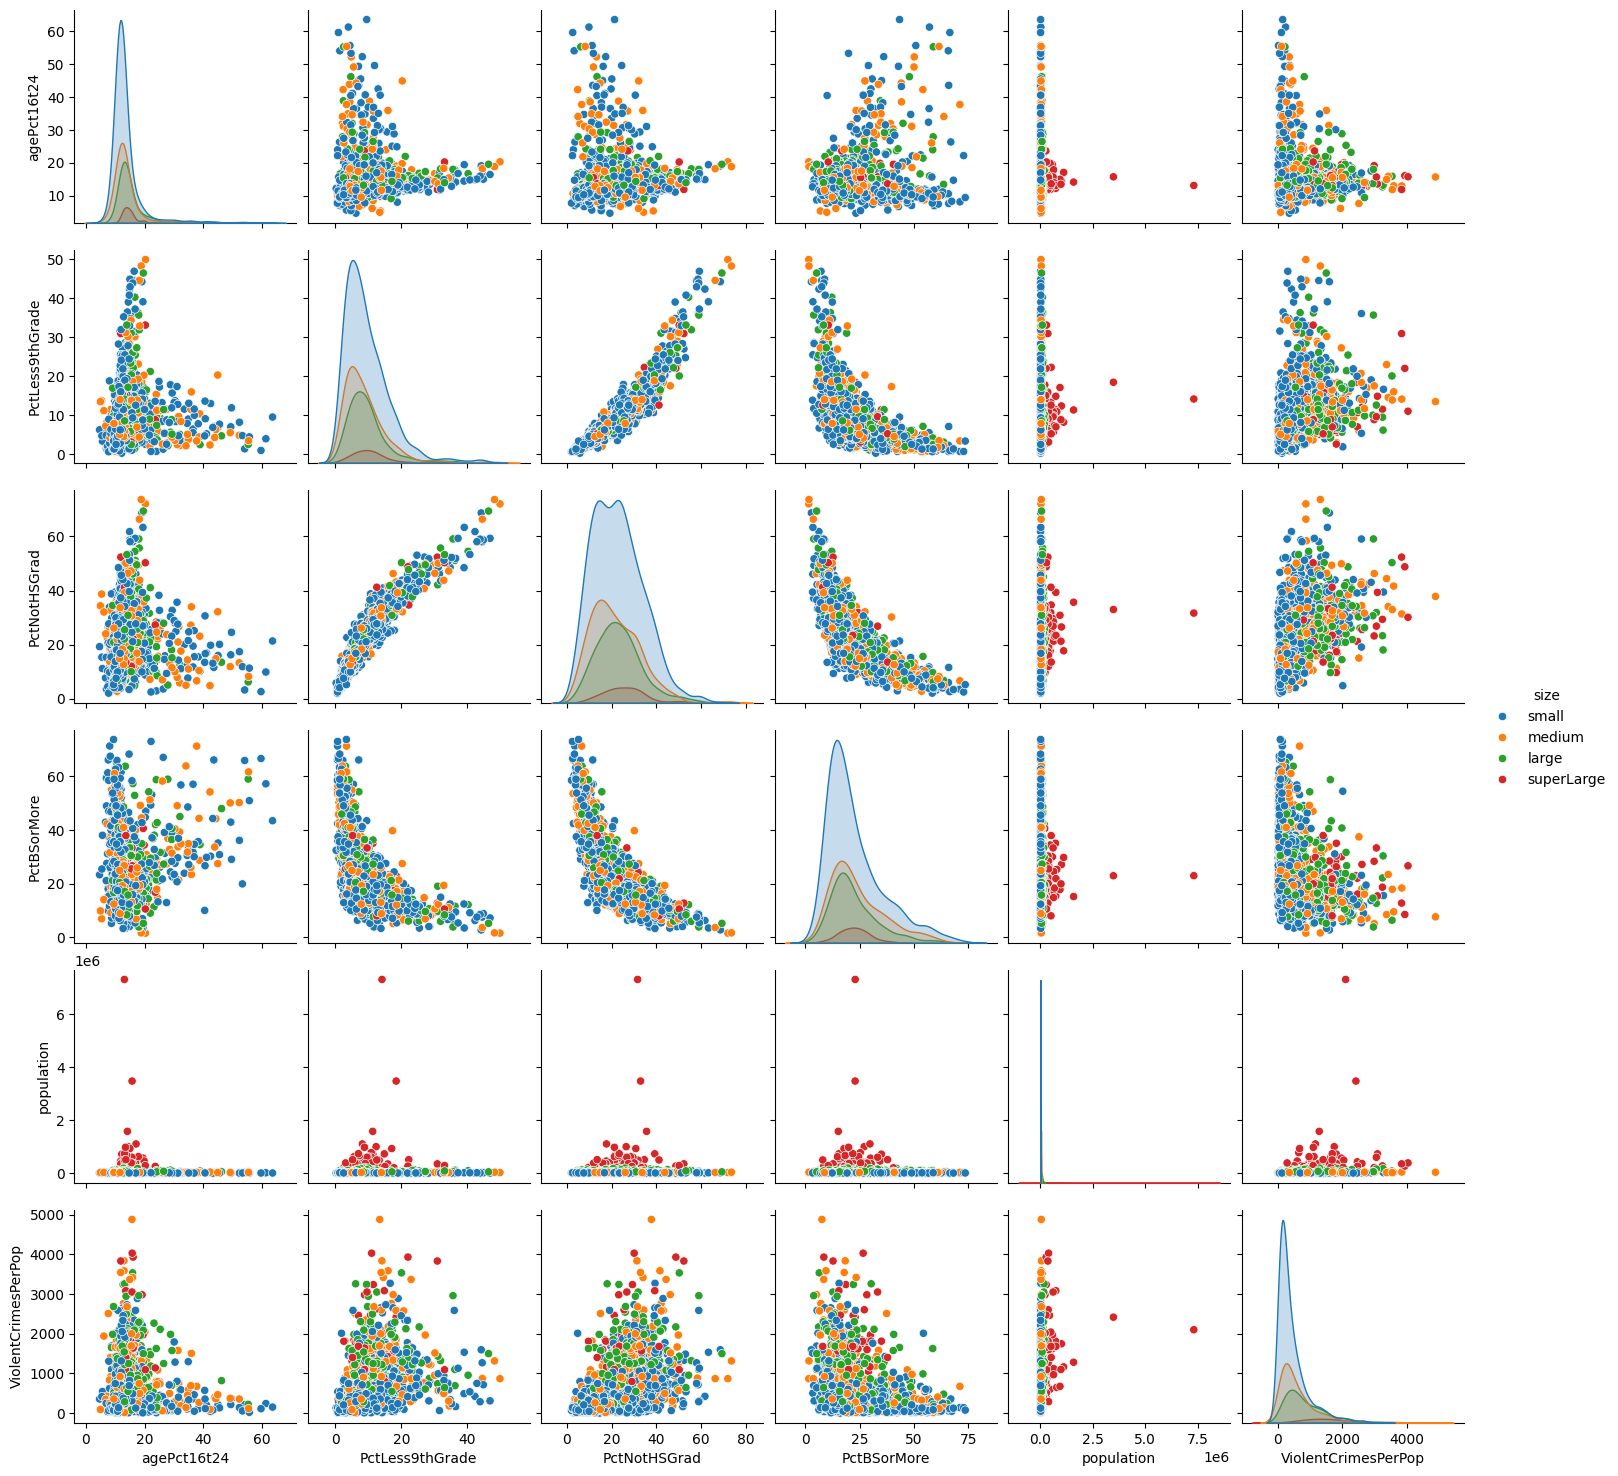

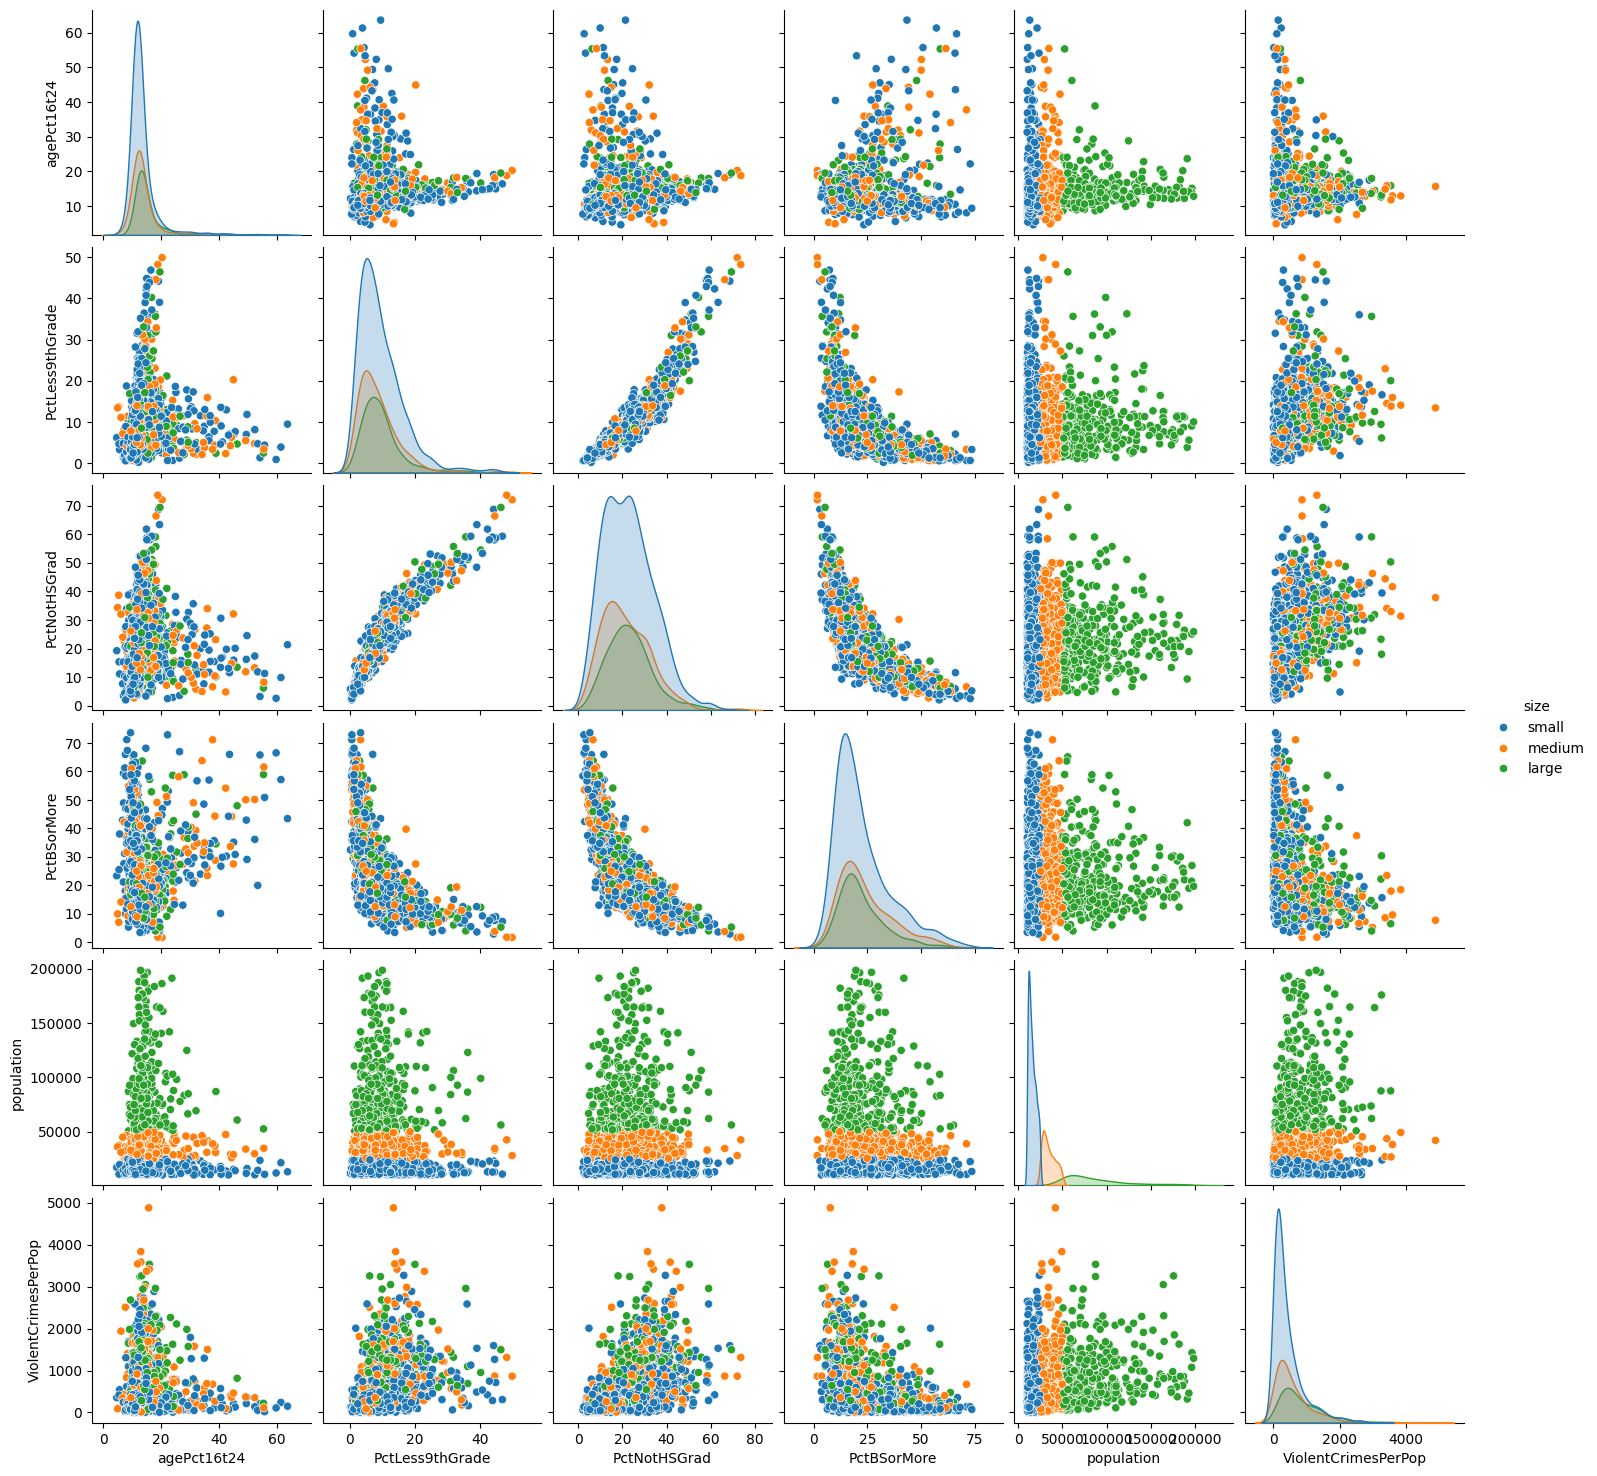

In [468]:
columns = ['agePct16t24', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'ViolentCrimesPerPop', 'size']
sns.pairplot(crime_in[columns], hue= 'size')

crime_in_less = crime_in[crime_in['population'] < 200000]
sns.pairplot(crime_in_less[columns], hue= 'size')

In [469]:
# correlation matrix
corrcolumns = ['agePct16t24', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'ViolentCrimesPerPop']

crime_small = crime_in.loc[crime_in['size'] == 'small']
crime_medium = crime_in.loc[crime_in['size'] == 'medium']
crime_large = crime_in.loc[crime_in['size'] == 'large']
crime_superLarge = crime_in.loc[crime_in['size'] == 'superLarge']

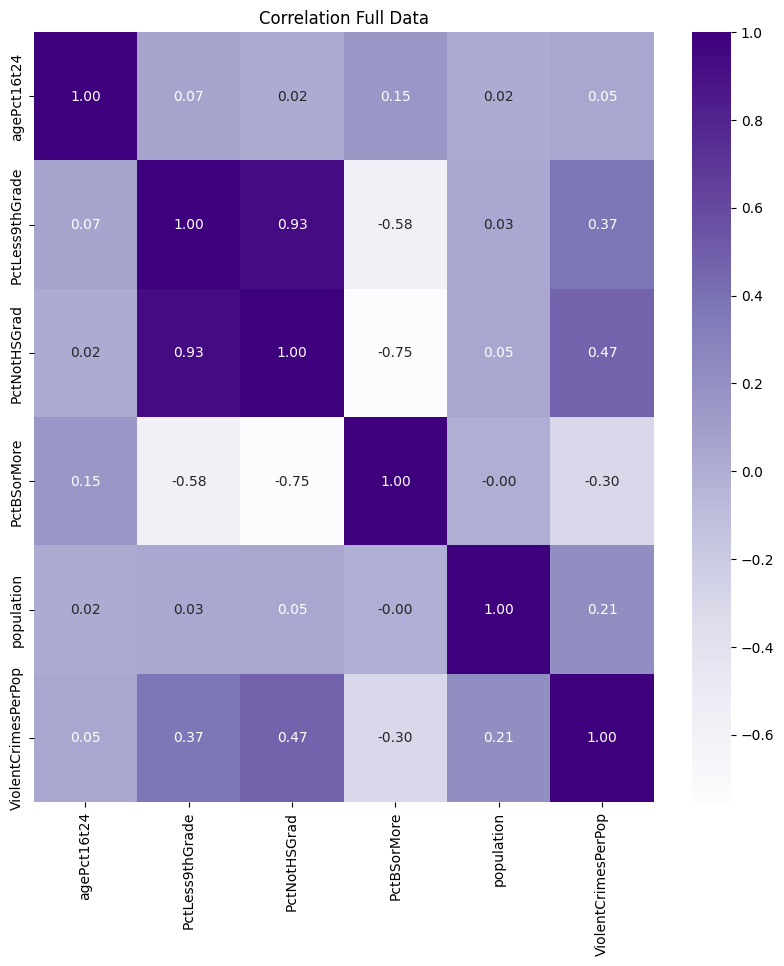

In [470]:
corr = crime_in[corrcolumns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Purples')
plt.title('Correlation Full Data')
plt.show()

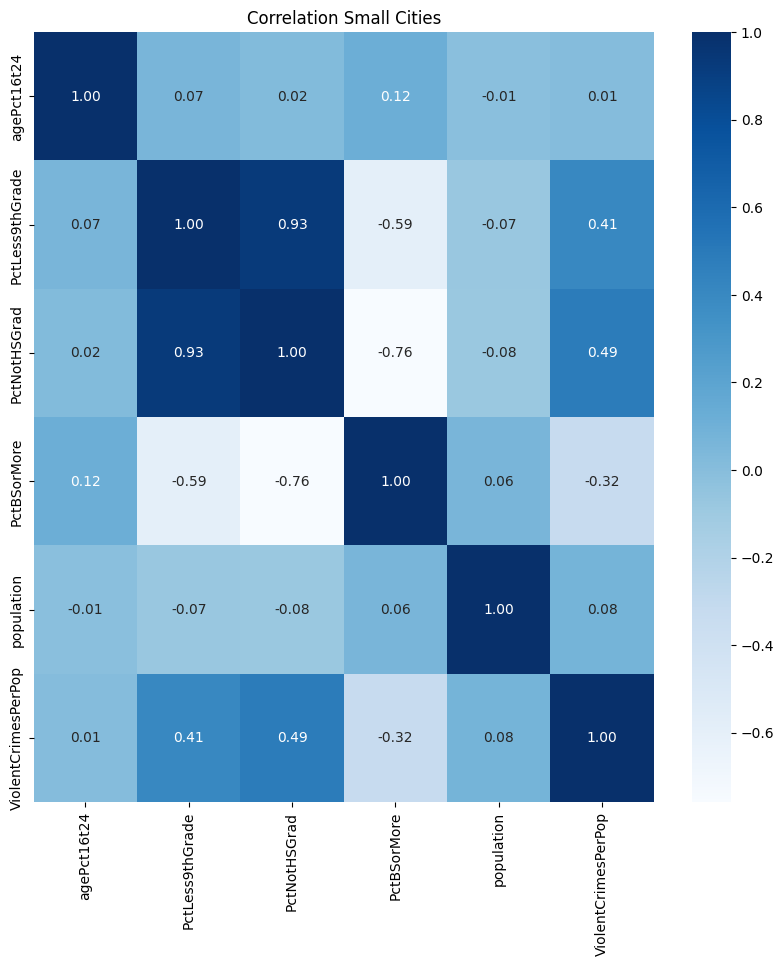

In [471]:
corr = crime_small[corrcolumns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Small Cities')
plt.show()

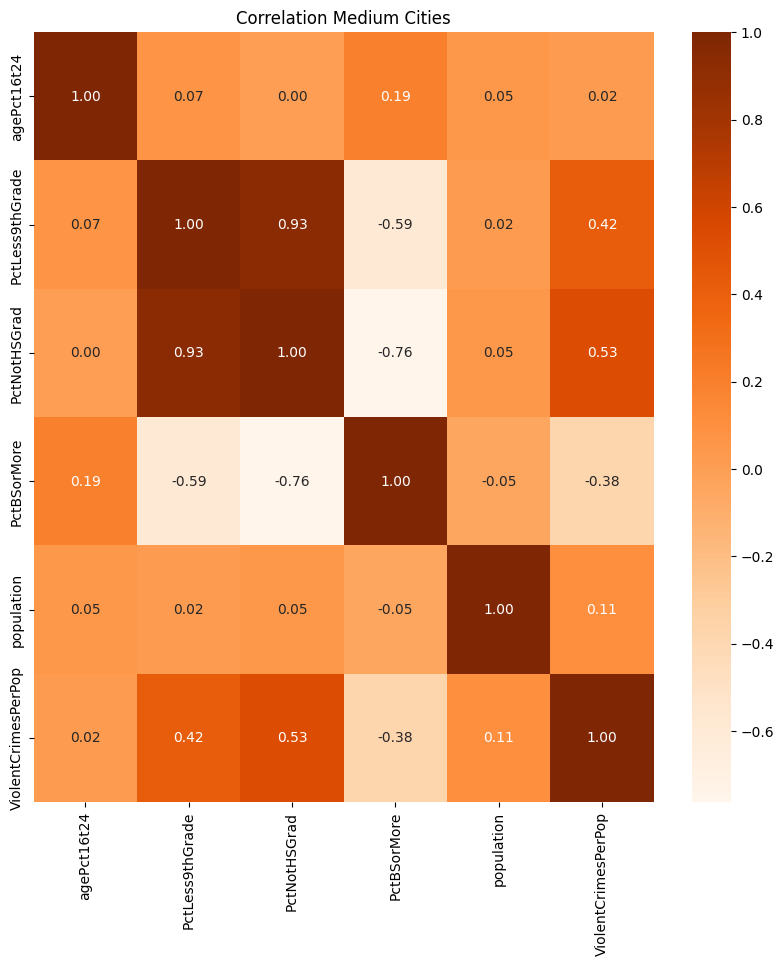

In [472]:
corr = crime_medium[corrcolumns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Oranges')
plt.title('Correlation Medium Cities')
plt.show()

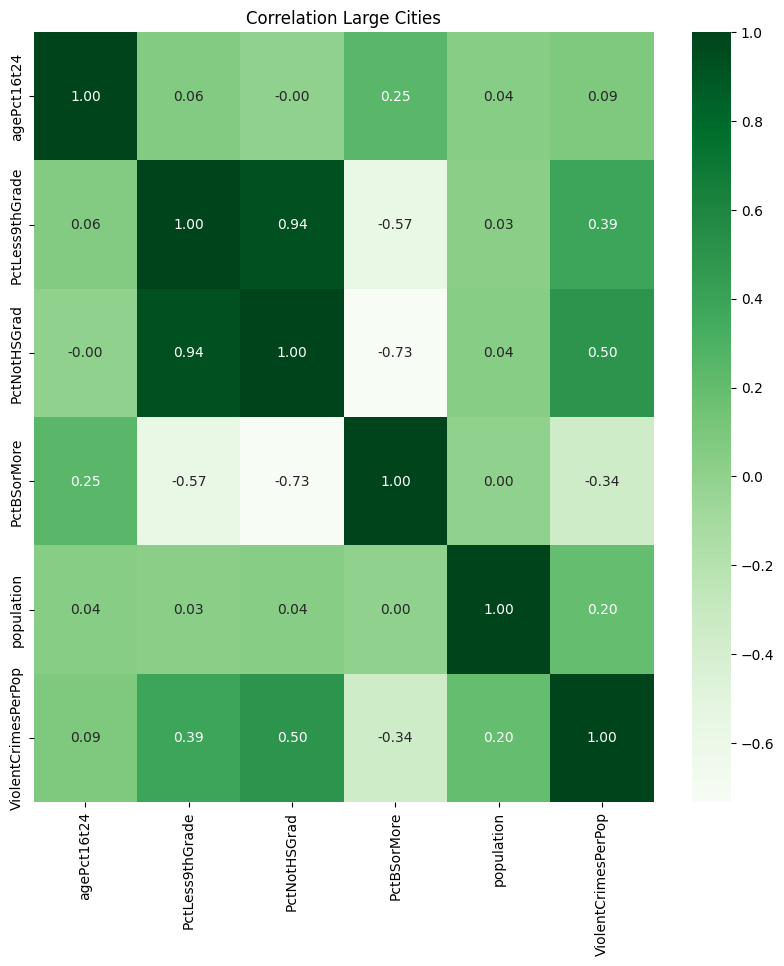

In [473]:
corr = crime_large[corrcolumns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Greens')
plt.title('Correlation Large Cities')
plt.show()

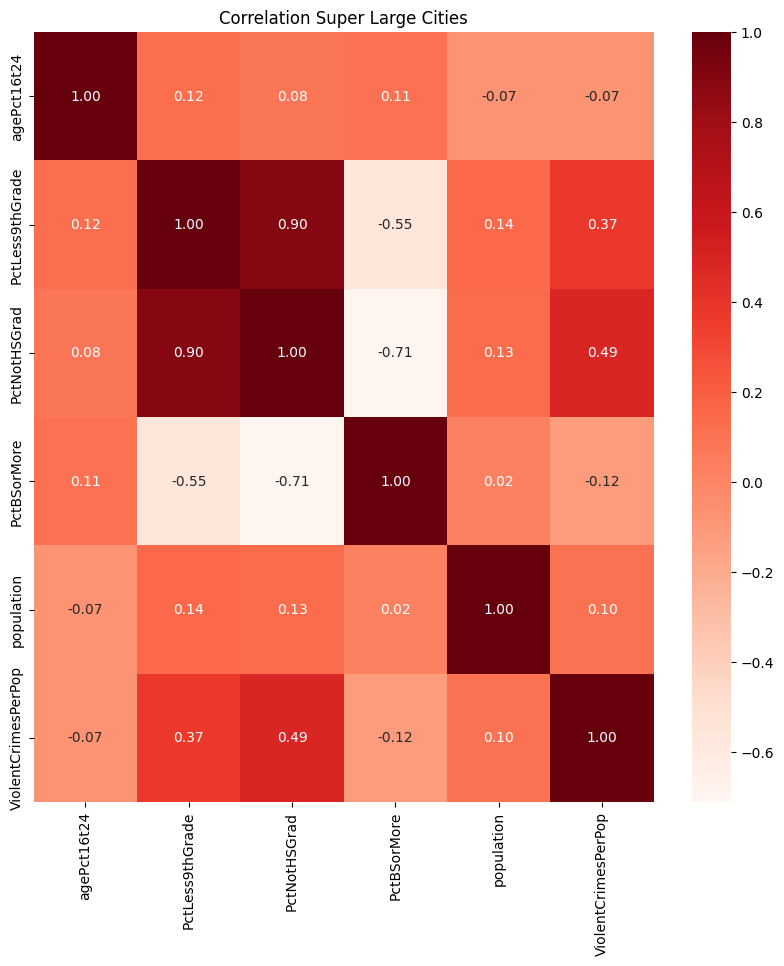

In [474]:
corr = crime_superLarge[corrcolumns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Reds')
plt.title('Correlation Super Large Cities')
plt.show()

In [475]:
# make a crime_clean_set with all the columns used above
columns = ['agePct16t24', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'ViolentCrimesPerPop', 'size']
crime_clean_set = crime_in[columns]


In [476]:
crime_clean_set

,agePct16t24,PctLess9thGrade,PctNotHSGrad,PctBSorMore,population,ViolentCrimesPerPop,size
0,10.93,5.81,9.90,48.18,11980,41.02,small
1,10.48,5.61,13.72,29.89,23123,127.56,small
2,11.01,2.80,9.09,30.13,29344,218.59,medium
3,12.19,11.05,33.68,10.81,16656,306.64,small
5,20.04,8.76,23.03,20.66,140494,442.95,large
...,...,...,...,...,...,...,...
2210,14.34,17.12,30.87,15.79,56216,545.75,large
2211,16.97,12.51,27.71,19.28,12251,124.10,small
2212,9.53,7.82,26.14,12.42,32824,353.83,medium
2213,14.73,24.37,39.63,12.40,13547,691.17,small


In [477]:
top_10 = crime_clean_set.sort_values(by='PopDens', ascending=False).head(10)
top_10['City_State'] = top_10['communityname'] + ', ' + top_10['state']

plt.barh(top_10['City_State'], top_10['PopDens'], color='skyblue')

plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Population Density (people per square mile)')
plt.ylabel('City, State')
plt.title('Top 10 Cities and States by Population Density')

# Show the plot
plt.show()

KeyError: 'PopDens'

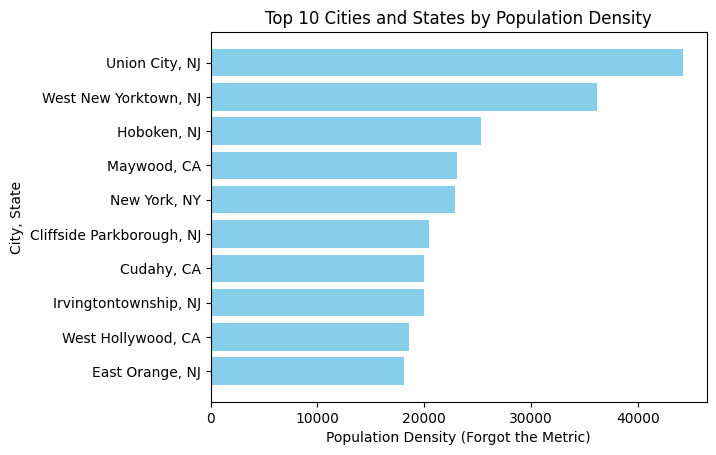

In [459]:
import matplotlib.pyplot as plt


def clean_city_name(city):
    
    if city.endswith('city'):
        city = city[:-4]  #
    
    
    cleaned_city = ''
    for i, char in enumerate(city):
        if i > 0 and char.isupper() and city[i-1].islower():  
            cleaned_city += ' '  
        cleaned_city += char  
    
    return cleaned_city


top_10 = crime_clean_set.sort_values(by='PopDens', ascending=False).head(10)
top_10['communityname'] = top_10['communityname'].apply(clean_city_name)


top_10['City_State'] = top_10['communityname'] + ', ' + top_10['state']


plt.barh(top_10['City_State'], top_10['PopDens'], color='skyblue')

#
plt.gca().invert_yaxis()


plt.xlabel('Population Density (Forgot the Metric)')
plt.ylabel('City, State')
plt.title('Top 10 Cities and States by Population Density')


plt.show()

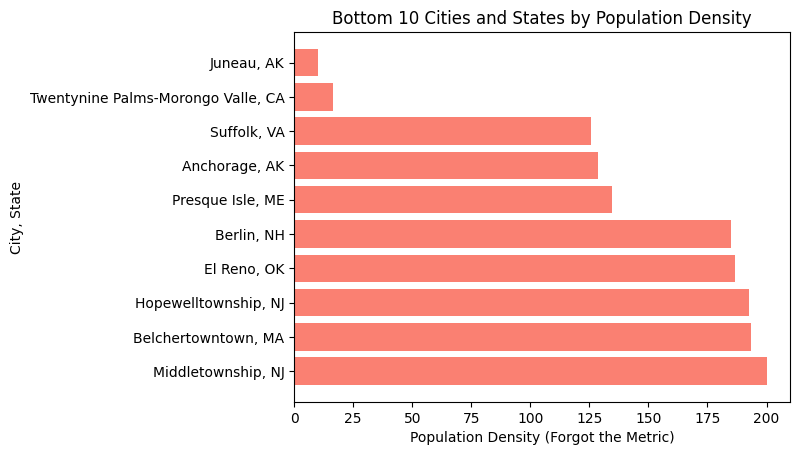

In [460]:
import matplotlib.pyplot as plt

def clean_city_name(city):
    if city.endswith('city'):
        city = city[:-4]
    
    cleaned_city = ''
    for i, char in enumerate(city):
        if i > 0 and char.isupper() and city[i-1].islower():
            cleaned_city += ' '
        cleaned_city += char
    
    return cleaned_city

# Get the bottom 10 cities by population density
bottom_10 = crime_clean_set.sort_values(by='PopDens', ascending=True).head(10)
bottom_10['communityname'] = bottom_10['communityname'].apply(clean_city_name)

bottom_10['City_State'] = bottom_10['communityname'] + ', ' + bottom_10['state']

plt.barh(bottom_10['City_State'], bottom_10['PopDens'], color='salmon')

plt.gca().invert_yaxis()

plt.xlabel('Population Density (Forgot the Metric)')
plt.ylabel('City, State')
plt.title('Bottom 10 Cities and States by Population Density')

plt.show()